<img width = 130 height = 130 align = left src="tfkeras.jpg">
 
# Tensorflow for Deep Learning [SOLUTIONS]

Learning Objectives: *By the end of this assignment, you should be comfortable with using Keras Sequential and Functional APIs for constructing deep learning models. You should be comfortable with debugging common modeling errors and researching Tensorflow documentation for various open-ended tasks.*

**Keras** is a deep learning API that runs on top of Tensorflow, with **layers** and **models** as the core data structures. In Tensorflow 2.0, modeling functionalities are organized under the Keras namespace. (Optional: read about v1 --> v2 API cleanup [here](https://github.com/tensorflow/community/blob/master/rfcs/20180827-api-names.md))

Keras provides a clean, approachable interface with abstractions and building blocks for easy prototyping and modeling customizations. 

In [ ]:
# tensorflow_version works only in colab
try: 
    %tensorflow_version 2.x
except Exception: 
    pass

import tensorflow as tf
tf.__version__

In [17]:
# several examples use the mnist dataset -- hence import & split into train/valid/test sets

"""
Background on Fashion-MNIST Dataset: 
Fashion-MNIST is a dataset of Zolando's article images, containing 60k training samples and 10k test samples.  
Each 28x28 greyscale image belongs to one of ten classes (t-shirt/top, trouser, pullover, dress, coat, sandal, 
shirt, sneaker, bag, ankle boot). Each pixel-value is an integer between 0 and 255, where higher means darker.
"""
from tensorflow.keras.datasets import mnist
(x_train_full, y_train_full), (x_test,  y_test) = mnist.load_data()

# amount to be in the validation set (80/20 split)
split_amt = int(len(x_train_full) * .2)

x_train, x_valid = x_train_full[split_amt:] / 255, x_train_full[:split_amt] / 255
y_train, y_valid = y_train_full[split_amt:], y_train_full[:split_amt]

## 1. Sequential API 

The Sequential API allows one to construct the simplest type of model: one with a linear stock of layers -- ie. layers created in a step by step fashion. 

In the example below, we are interested in constructing a model for 10-class classification with the Fashion-MNIST dataset. Carefully examine the code and associated comments below. 

In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense

# creates a list of layer definitions
seq_model = Sequential([ 
    # flattens 28x28 image to a 1D array 
    Flatten(input_shape=(28, 28)), 
    # fully connected hidden layer with 256 neurons & relu activation
    Dense(256, activation="relu"), 
    # fully connected hidden layer with 128 neurons & relu activation 
    Dense(128, activation="relu"), 
    # fully connected output layer with 10 neurons & softmax activation 
    Dense(10, activation="softmax")
])

# displays model layers (+ layer (type), output shape, param #)
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


The next step following model instantiation is to call the *compile()* method and specify a loss function, optimizer, and metrics.

In [4]:
                  # loss -- String (name of objective function), objective function, or Loss instance.
seq_model.compile(loss = "sparse_categorical_crossentropy",
                  # optimizer -- String (name of optimizer) or optimizer instance. 
                  optimizer = "sgd", 
                  # list of metrics to be evaluated by the model during training and testing.
                  # each can be a String (name of built-in function), function, or Metric instance. 
                  metrics = ["accuracy"])

The final step is to train the model by calling the *fit()* method. <br> Doing so returns a *History* object, with its *History.history* attribute holding records of training loss and metrics values at every epoch. 

In [5]:
                            # input data
seq_history = seq_model.fit(x = x_train, 
                            # input labels
                            y = y_train, 
                            # epoch -- an iteration over the entire x and y dataset provided
                            epochs = 2, 
                            # data on which to evaluate the loss and any model metrics at the ennd of each epoch
                            validation_data = (x_valid, y_valid))

Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6477 - accuracy: 0.8352 - val_loss: 0.3364 - val_accuracy: 0.9053
Epoch 2/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3026 - accuracy: 0.9139 - val_loss: 0.2666 - val_accuracy: 0.9251


Generally, fitting the "best" model may take a number of iterations -- possibly needing several hyperparameter adjustments! Once complete, the final step is to evaluate the model using the *evaluate()* method on the test set. Recall that the model is evaluated only ONCE on the test set. 

In [18]:
# returns loss value & metrics values for model in test mode (default batchsize is 32)
test_loss, test_accuracy = seq_model.evaluate(x_test, y_test)
print(f'train loss: {test_loss:.3f}')
print(f'train accuracy: {100 * test_accuracy:.3f}%')

313/313 [==============================] - 0s 892us/step - loss: 33.2392 - accuracy: 0.9245
train loss: 33.239
train accuracy: 92.450%


In summary, the general steps to constructing a model using the Sequential API are: <br> 
1. Sequential instantiation, with a list of layers
2. Compiling the model, indicating the desired loss function, optimizer, and metric(s)
3. Fitting the model with the dataset
4. Evaluating the model on the test set

While the Sequential API is easy to use, we cannot create models that share layers, have branches, nor have multiple inputs/outputs. However, we *can* with the Functional API. 

#### TO DO: Part 1 Questions
You may consult Tensorflow documentation and online sources for any of the questions below. <br>
a) Describe the architecture of *seq_model* above. (ie. how many/what types of layers? what is a dense? flatten?) <br>

The model's "Flatten" layer flattens the image inputs. The model represents a neural network with three densely connected layers, with 256, 128, and 10 neurons respectively. Densely connected layers are fully connected neural network layers and implement the operation *activation(dot(input, kernel) + bias)*. 

b) What happens if you do not specify an activation function for any one of the dense layers? <br>

If nothing is specified, then no activation is applied. (ie. "linear activation")

c) The three dense layers in *seq_model* have 200960, 32896, and 1290 trainable parameters respectively. Based on your knowledge of densely connected neural networks, explain how these numbers are derived. <br> 

They are derived from the number of weight and bias parameters. (In terms of matrix multiplication, an (n x b) dimensional matrix multiplied by a (b x a) dimentional matrix results in a (n x a) dimentional matrix. "None" represents n because the model does not know the size of the dataset until it is fed into it. <br> 
200960 = (784 * 256) + 256 <br>
32896 = (256 * 128) + 128 <br>
1290 = (128 * 10) + 10 <br>

d) Why is the loss function sparse categorical crossentropy? <br>

Lables are integer values, rather than one hot representations. 

e) What happens if you do not specify a number of epochs in *fit()*? 

By default, running *fit()* will train for 1 epoch. 

## 2. Functional API - Pt1

*func_model* below contains the same architecture as *seq_model*, but uses the Functional API. Carefully examine the code below and read the comments. Compare it with the Sequential syntax above. What differences and similarities do you notice? 

In [13]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model 

# define input tensor
input_layer = Input(shape = (28, 28))

# stack layers using the syntax: current_layer()(previous_layer)
flattened = Flatten()(input_layer)
fc1 = Dense(256, activation = "relu")(flattened)
fc2 = Dense(128, activation = "relu")(fc1)
predictions = Dense(10, activation = "softmax")(fc2)

# define model object -- specify input and outputs
func_model = Model(inputs = [input_layer], outputs = [predictions])

# displays model layers (+ layer (type), output shape, param #)
func_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


As with the Sequential model, we call the *compile()* method and specify a loss function, optimizer, and metrics. Then, call the *fit()* method.  

In [14]:
func_model.compile(loss = "sparse_categorical_crossentropy", 
                   optimizer = "sgd", 
                   metrics = ["accuracy"])

func_history = func_model.fit(x_train, 
                              y_train, 
                              epochs = 20, 
                              validation_data = (x_valid, y_valid))

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6545 - accuracy: 0.8285 - val_loss: 0.3344 - val_accuracy: 0.9068
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3070 - accuracy: 0.9129 - val_loss: 0.2705 - val_accuracy: 0.9227
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2537 - accuracy: 0.9267 - val_loss: 0.2322 - val_accuracy: 0.9333
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2187 - accuracy: 0.9376 - val_loss: 0.2044 - val_accuracy: 0.9394
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1933 - accuracy: 0.9445 - val_loss: 0.1883 - val_accuracy: 0.9459
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1725 - accuracy: 0.9509 - val_loss: 0.1670 - val_accuracy: 0.9513
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1552 - accuracy: 0.9553 - val_loss: 0.1563 - val_accuracy:

Finally, we evaluate the model on the test set. 

In [20]:
# returns loss value & metrics values for model in test mode (default batchsize is 32)
test_loss, test_accuracy = func_model.evaluate(x_test, y_test)
print(f'train loss: {test_loss:.3f}')
print(f'train accuracy: {100 * test_accuracy:.3f}%')

313/313 [==============================] - 0s 1ms/step - loss: 13.6825 - accuracy: 0.9708
train loss: 13.682
train accuracy: 97.080%


In summary, the general steps to constructing a model using the Functional API are: <br>
1. explicitly defining the input layer
2. defining model layers, connecting each layer using Python functional syntax
3. defining the model by calling the model object and giving it the input and output layers
4. compiling --> fitting (several iterations) --> evaluating

#### TO DO: Part 2 Questions 
You may consult Tensorflow documentation and online sources for the questions below. <br>
a) In the context of modeling, what are the advantage(s) of using the functional syntax? <br>

Functional syntax gives you more flexibility with customizing deep learning models. For example, you can have multiple inputs and/or multiple outputs and parallel layers. 

b) Notice that when defining the model object, the parameter names are plural (inputs vs input, outputs vs output). Why is this the case? <br>

Parameter names are plural because it can expect multiple inputs or outputs in a list. 

c) Refit either *seq_model* or *func_model* with epochs = 20. <br> Then evaluate the corresponding metrics in the following cell and plot two double-line graphs (remember to color code train & validation): <br>
1. train & validation loss for every epoch 
2. train & validation accuracy for every epoch <br> 
(You may import any necessary libraries) <br> 
Based on your graph(s), at how many epochs would you stop training? <br>

(answer varies) ~ 4-7

<class 'dict'> <class 'dict'>


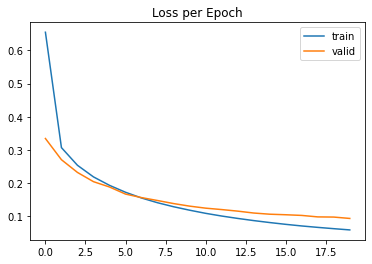

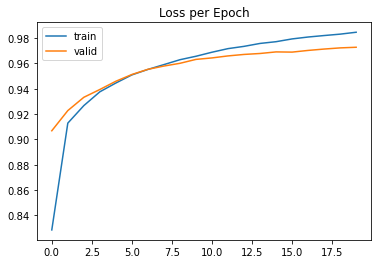

In [16]:
# select one
seq_metrics = seq_history.history
func_metrics = func_history.history

print(type(seq_metrics), type(func_metrics))

""" ### your code below ### """
import matplotlib.pyplot as plt

train_loss, val_loss = func_metrics['loss'], func_metrics['val_loss']
train_acc, val_acc = func_metrics['accuracy'], func_metrics['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Loss per Epoch')
plt.legend(('train', 'valid'))
plt.show()

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Loss per Epoch')
plt.legend(('train', 'valid'))
plt.show()

## 3. Functional API -- Pt2

As hinted, the Functional API allows you to create layers that are impossible with the Sequential API -- ex. parallel layers, splitting, concatenating, etc. We will explore these exclusive functionalities by ...

implement a siamese or inception network - let them fill in a base model and final model 

## 4. Modeling Hacks

1. custom loss
2. custom activation functions using lambda layers
3. callbacks & custom callbacks
4. data augmentation 

-- creating custom loss functions or a class for the function 
def my_loss_func(y_true, y_pred): pass
model.compile(loss = 'my_loss_func'...)

-- adding hyperparameters to custom loss functions
add wrapper around loss functions with hyperparams as parameters
def my_loss_func-wrap(hyperparam): 
    def my_loss_func ... 
model.compile(loss = my_loss_func_wrap(hyperparam) ... 

-- to implement a custom loss as a class -- must import tf.keras.losses import Loss
and then let the ccclass inheritfrom Loss
ex. class myloss(Loss): 





## 5. debugging

## 6. exploring documentation exercises

## 7 ethics of using tensorflow (maybe move this to assignment 1) 